# **UAS_5092_BDDM_PENJUALAN SEPEDA**

NAMA : CHRISTIAN NERY VANDELLA

NIM : 22.11.5092

KELAS : BDDM4

LINK : https://colab.research.google.com/drive/1wKkDWcCK9ZaQ0rfZp7yWaxC7SVklEJEF?usp=sharing

# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

# Baca Dataset

In [78]:
df = pd.read_csv('/content/drive/MyDrive/UAS BDDM/bike_buyers_clean.csv')

<Axes: ylabel='Density'>

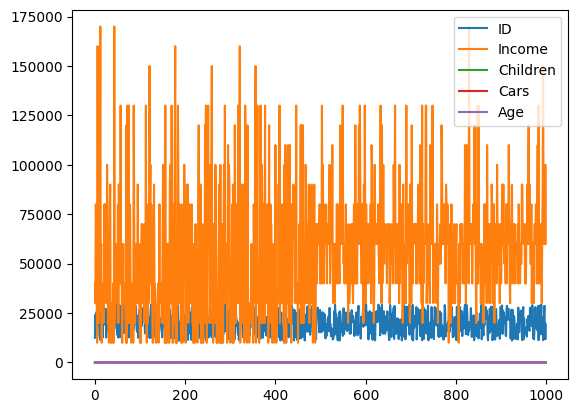

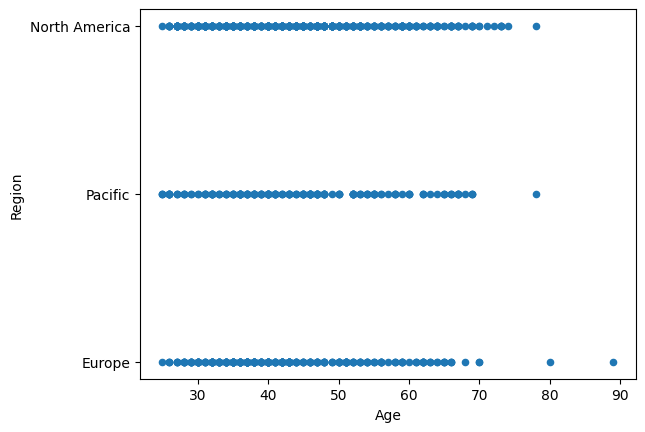

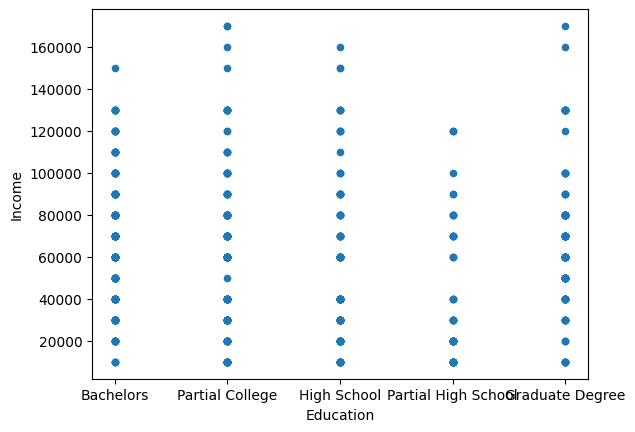

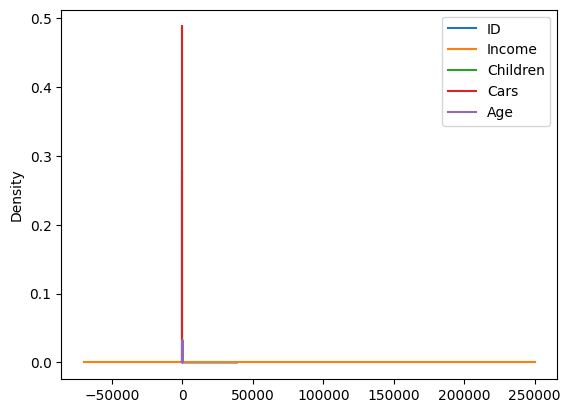

In [79]:
df.plot()
df.plot(kind='scatter',x='Age',y='Region')
df.plot(kind='scatter',x='Education',y='Income')
df.plot(kind='density')

In [80]:
df.shape


(1000, 13)

In [81]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


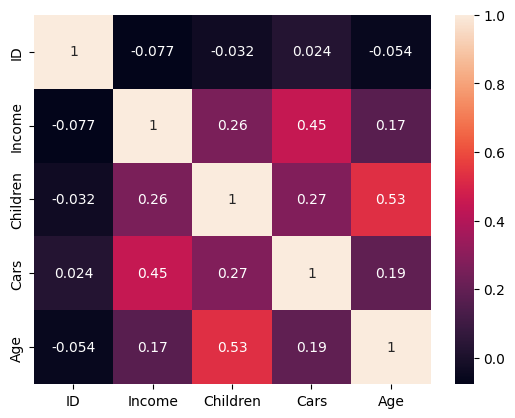

In [83]:
corrMatrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Analisis Variabel Numerik

In [84]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables
The numerical variables are : ['ID', 'Income', 'Children', 'Cars', 'Age']


In [85]:
df[numerical].head()

,ID,Income,Children,Cars,Age
0,12496,40000,1,0,42
1,24107,30000,3,1,43
2,14177,80000,5,2,60
3,24381,70000,0,1,41
4,25597,30000,0,0,36


In [86]:
# cek missing value di variabel numerik
df[numerical].isnull().sum()

,0
ID,0
Income,0
Children,0
Cars,0
Age,0


# Analisis Variabel Kategorikal

In [87]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 8 categorical variables
The categorical variables are : ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [88]:
df[categorical].head()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,No
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,No
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,No
3,Single,Male,Bachelors,Professional,Yes,5-10 Miles,Pacific,Yes
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Yes


In [89]:
df[categorical].isnull().sum()

,0
Marital Status,0
Gender,0
Education,0
Occupation,0
Home Owner,0
Commute Distance,0
Region,0
Purchased Bike,0


In [90]:
# Melihat jumlah frekuensi nilai dalam variabel kategorikal
for var in categorical:
    print(df[var].value_counts())
    print(df[var].value_counts() / float(len(df)))
    print()

Marital Status
Married    539
Single     461
Name: count, dtype: int64
Marital Status
Married    0.539
Single     0.461
Name: count, dtype: float64

Gender
Male      509
Female    491
Name: count, dtype: int64
Gender
Male      0.509
Female    0.491
Name: count, dtype: float64

Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64
Education
Bachelors              0.306
Partial College        0.265
High School            0.179
Graduate Degree        0.174
Partial High School    0.076
Name: count, dtype: float64

Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64
Occupation
Professional      0.276
Skilled Manual    0.255
Clerical          0.177
Management        0.173
Manual            0.119
Name: count, dtype: float64

Home Owner
Yes    685
No     315
Name: count, dtype: int64
H

In [91]:
# periksa kardinalitas dalam variabel kategorikal
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Marital Status  contains  2  labels
Gender  contains  2  labels
Education  contains  5  labels
Occupation  contains  5  labels
Home Owner  contains  2  labels
Commute Distance  contains  5  labels
Region  contains  3  labels
Purchased Bike  contains  2  labels


# Label Encoding

In [92]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Home Owner'] = label_encoder.fit_transform(df['Home Owner'])
df['Commute Distance'] = label_encoder.fit_transform(df['Commute Distance'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Purchased Bike'] = label_encoder.fit_transform(df['Purchased Bike'])
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1


# Kategorikan Data Berkelanjutan

In [93]:
df['Age'].describe()

,Age
count,1000.000000
mean,44.190000
std,11.353537
min,25.000000
25%,35.000000
50%,43.000000
75%,52.000000
max,89.000000


In [94]:
df['Age'] = pd.cut(x = df['Age'], bins = [0,30,40,50,60,100,150], labels = [0, 1, 2, 3, 4, 5])
df['Age'] = df['Age'].astype('int64')
df['Age'].isnull().sum()

0

In [95]:
df['Income'].describe()

,Income
count,1000.000000
mean,56140.000000
std,31081.609779
min,10000.000000
25%,30000.000000
50%,60000.000000
75%,70000.000000
max,170000.000000


In [96]:
df['Income'] = pd.cut(x = df['Income'], bins = [0, 30000, 50000, 75000, 100000, 150000, 200000], labels = [1, 2, 3, 4, 5, 6])
df['Income'] = df['Income'].astype('int64')
df['Income'].isnull().sum()

0

In [97]:
df.dtypes

,0
ID,int64
Marital Status,int64
Gender,int64
Income,int64
Children,int64
Education,int64
Occupation,int64
Home Owner,int64
Cars,int64
Commute Distance,int64


In [98]:
df[:].isnull().sum()

,0
ID,0
Marital Status,0
Gender,0
Income,0
Children,0
Education,0
Occupation,0
Home Owner,0
Cars,0
Commute Distance,0


In [99]:
df.groupby('Purchased Bike').mean()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
Purchased Bike,,,,,,,,,,,,
0,19676.019268,0.408478,0.514451,2.499037,2.098266,1.815029,2.246628,0.693642,1.670520,1.759152,0.859345,1.947977
1,20278.873181,0.517672,0.503119,2.607069,1.702703,1.432432,2.272349,0.675676,1.216216,1.521830,0.927235,1.731809


# Splitting Data

In [100]:
X = df.drop(['Purchased Bike'], axis=1)
y = df['Purchased Bike']

In [103]:
# membagi x dan y menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
X_train.shape, X_test.shape

((700, 12), (300, 12))

In [104]:
X_train.head(100)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
763,12882,0,1,2,1,1,4,1,0,0,1,1
534,24637,0,1,2,4,2,3,1,2,2,1,4
86,17191,1,1,5,3,3,3,0,3,0,0,3
927,11823,0,0,3,0,1,3,1,0,3,1,1
134,21094,1,0,1,2,3,0,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
567,14754,0,1,2,1,3,0,1,1,1,1,2
236,25693,1,0,1,5,1,0,1,0,0,0,2
243,22527,1,0,1,0,2,2,0,1,3,0,0
601,29231,1,0,4,4,3,3,0,2,0,1,2


In [105]:
X_train.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
712,28026,0,0,2,2,2,3,0,2,3,1,3
481,28564,1,0,2,2,3,0,1,0,1,0,1
869,26065,1,0,5,3,0,1,0,4,1,1,2
348,23915,0,1,1,2,2,2,1,2,0,0,2
448,11383,0,0,1,3,1,0,1,0,0,0,2


In [107]:
X_train.shape

(700, 12)

In [109]:
X_test.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
842,15555,0,0,3,1,3,4,1,1,3,1,2
68,14813,1,0,1,4,2,2,1,1,0,0,2
308,28758,0,1,2,2,3,0,1,1,1,0,1
881,11275,0,0,4,4,1,1,1,2,0,1,4
350,27878,1,1,1,0,3,2,0,0,0,2,0


In [110]:
X_test.shape

(300, 12)

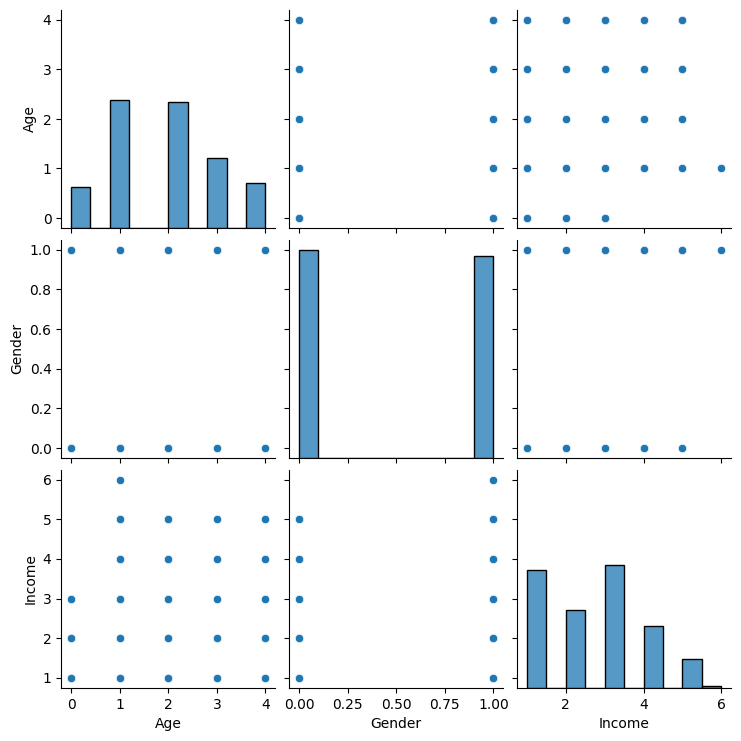

In [112]:
sns.pairplot(X_test[["Age","Gender","Income"]])

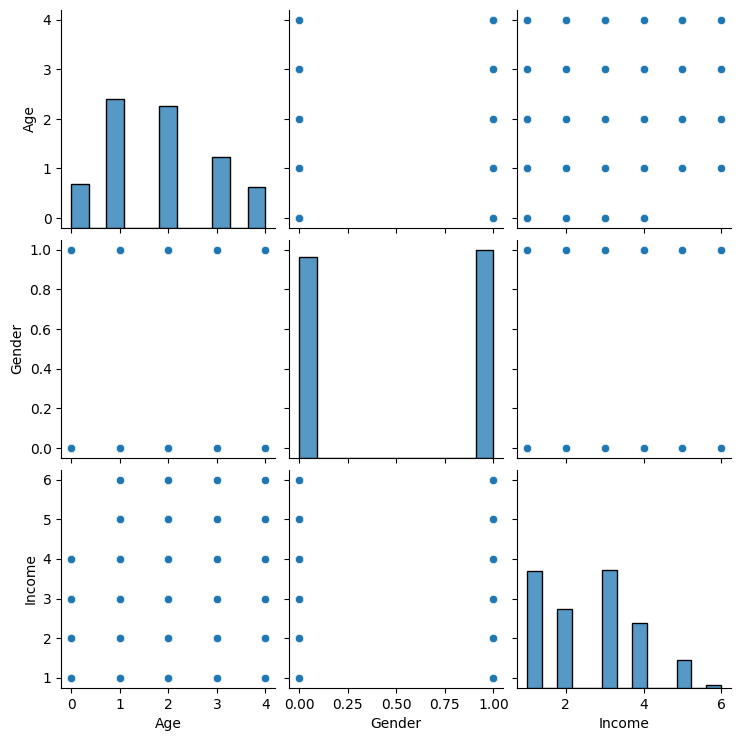

In [114]:
sns.pairplot(df[["Age","Gender","Income"]])

# Gausian Naive Bayes

In [116]:
# melatih pengklasifikasi Gaussian Naive Bayes di set pelatihan
from sklearn.naive_bayes import GaussianNB

# membuat instance modelnya
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [117]:
y_pred = gnb.predict(X_test)

y_pred[:10]
len(y_pred)

300

In [119]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6467


In [121]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6357


In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[101  44]
 [ 62  93]]


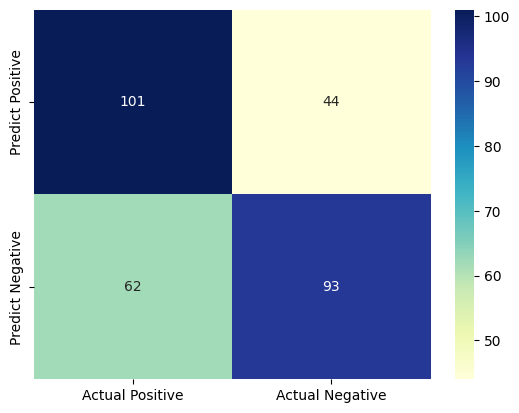

In [125]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       145
           1       0.68      0.60      0.64       155

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300



# Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
classifier = LogisticRegression(random_state = 999)

In [130]:
df[:].isnull().sum()

,0
ID,0
Marital Status,0
Gender,0
Income,0
Children,0
Education,0
Occupation,0
Home Owner,0
Cars,0
Commute Distance,0


In [141]:
cols_to_be_normalized = ["Income","Children","Education","Occupation","Cars","Commute Distance","Region","Age"]
cols_not_to_be_normalized = ["Marital Status","Gender","Home Owner","Purchased Bike"]

normalized = normalize(df[cols_to_be_normalized])
boolean = df[cols_not_to_be_normalized]

In [142]:
df_normalized = pd.DataFrame(normalized,columns = cols_to_be_normalized)
df_boolean = pd.DataFrame(boolean,columns=cols_not_to_be_normalized)
df_final = df_normalized.merge(df_boolean,left_index=True, right_index=True)

In [144]:
A = df.drop(['Purchased Bike'], axis=1)
B = df['Purchased Bike']
A_train,A_test,B_train,B_test = train_test_split(A,B,random_state = 999,test_size =0.3)
classifier = LogisticRegression(random_state = 1)
classifier.fit(A_train, B_train)
B_pred = classifier.predict(A_test)
classifier.fit(A_train, B_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(random_state=1)

In [146]:
print(len(A_train))
print(len(A_test))

700
300


In [148]:
trainscore=classifier.score(A_train,B_train)
print(trainscore)
testscore=classifier.score(A_test,B_test)
print(testscore)

0.6414285714285715
0.6366666666666667


In [150]:
B_pred = classifier.predict(A_test)
print ("Accuracy : ", accuracy_score(B_test, B_pred))
print(classification_report(B_test, B_pred))

Accuracy :  0.6366666666666667
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       145
           1       0.66      0.62      0.64       155

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.64      0.64      0.64       300



In [152]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm = confusion_matrix(B_test, B_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[95 50]
 [59 96]]


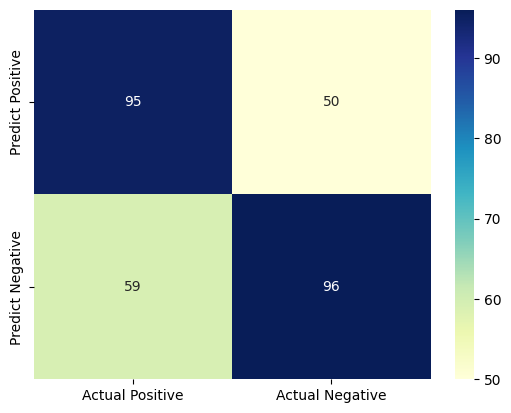

In [154]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [155]:
lgtpredict=classifier.predict(A_test)
metrics.roc_auc_score(y_test,lgtpredict,average='weighted')

0.6372636262513904

# Decision Tree Classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Buat objek pengklasifikasi Pohon Keputusan
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=999)

# Latih Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Memprediksi respons untuk kumpulan data pengujian
y_pred2 = clf.predict(X_test)

In [158]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score: 0.6067


In [159]:
y_pred_train2 = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train2)))

Training-set accuracy score: 0.6543


**Visualisasi Decision Tree**

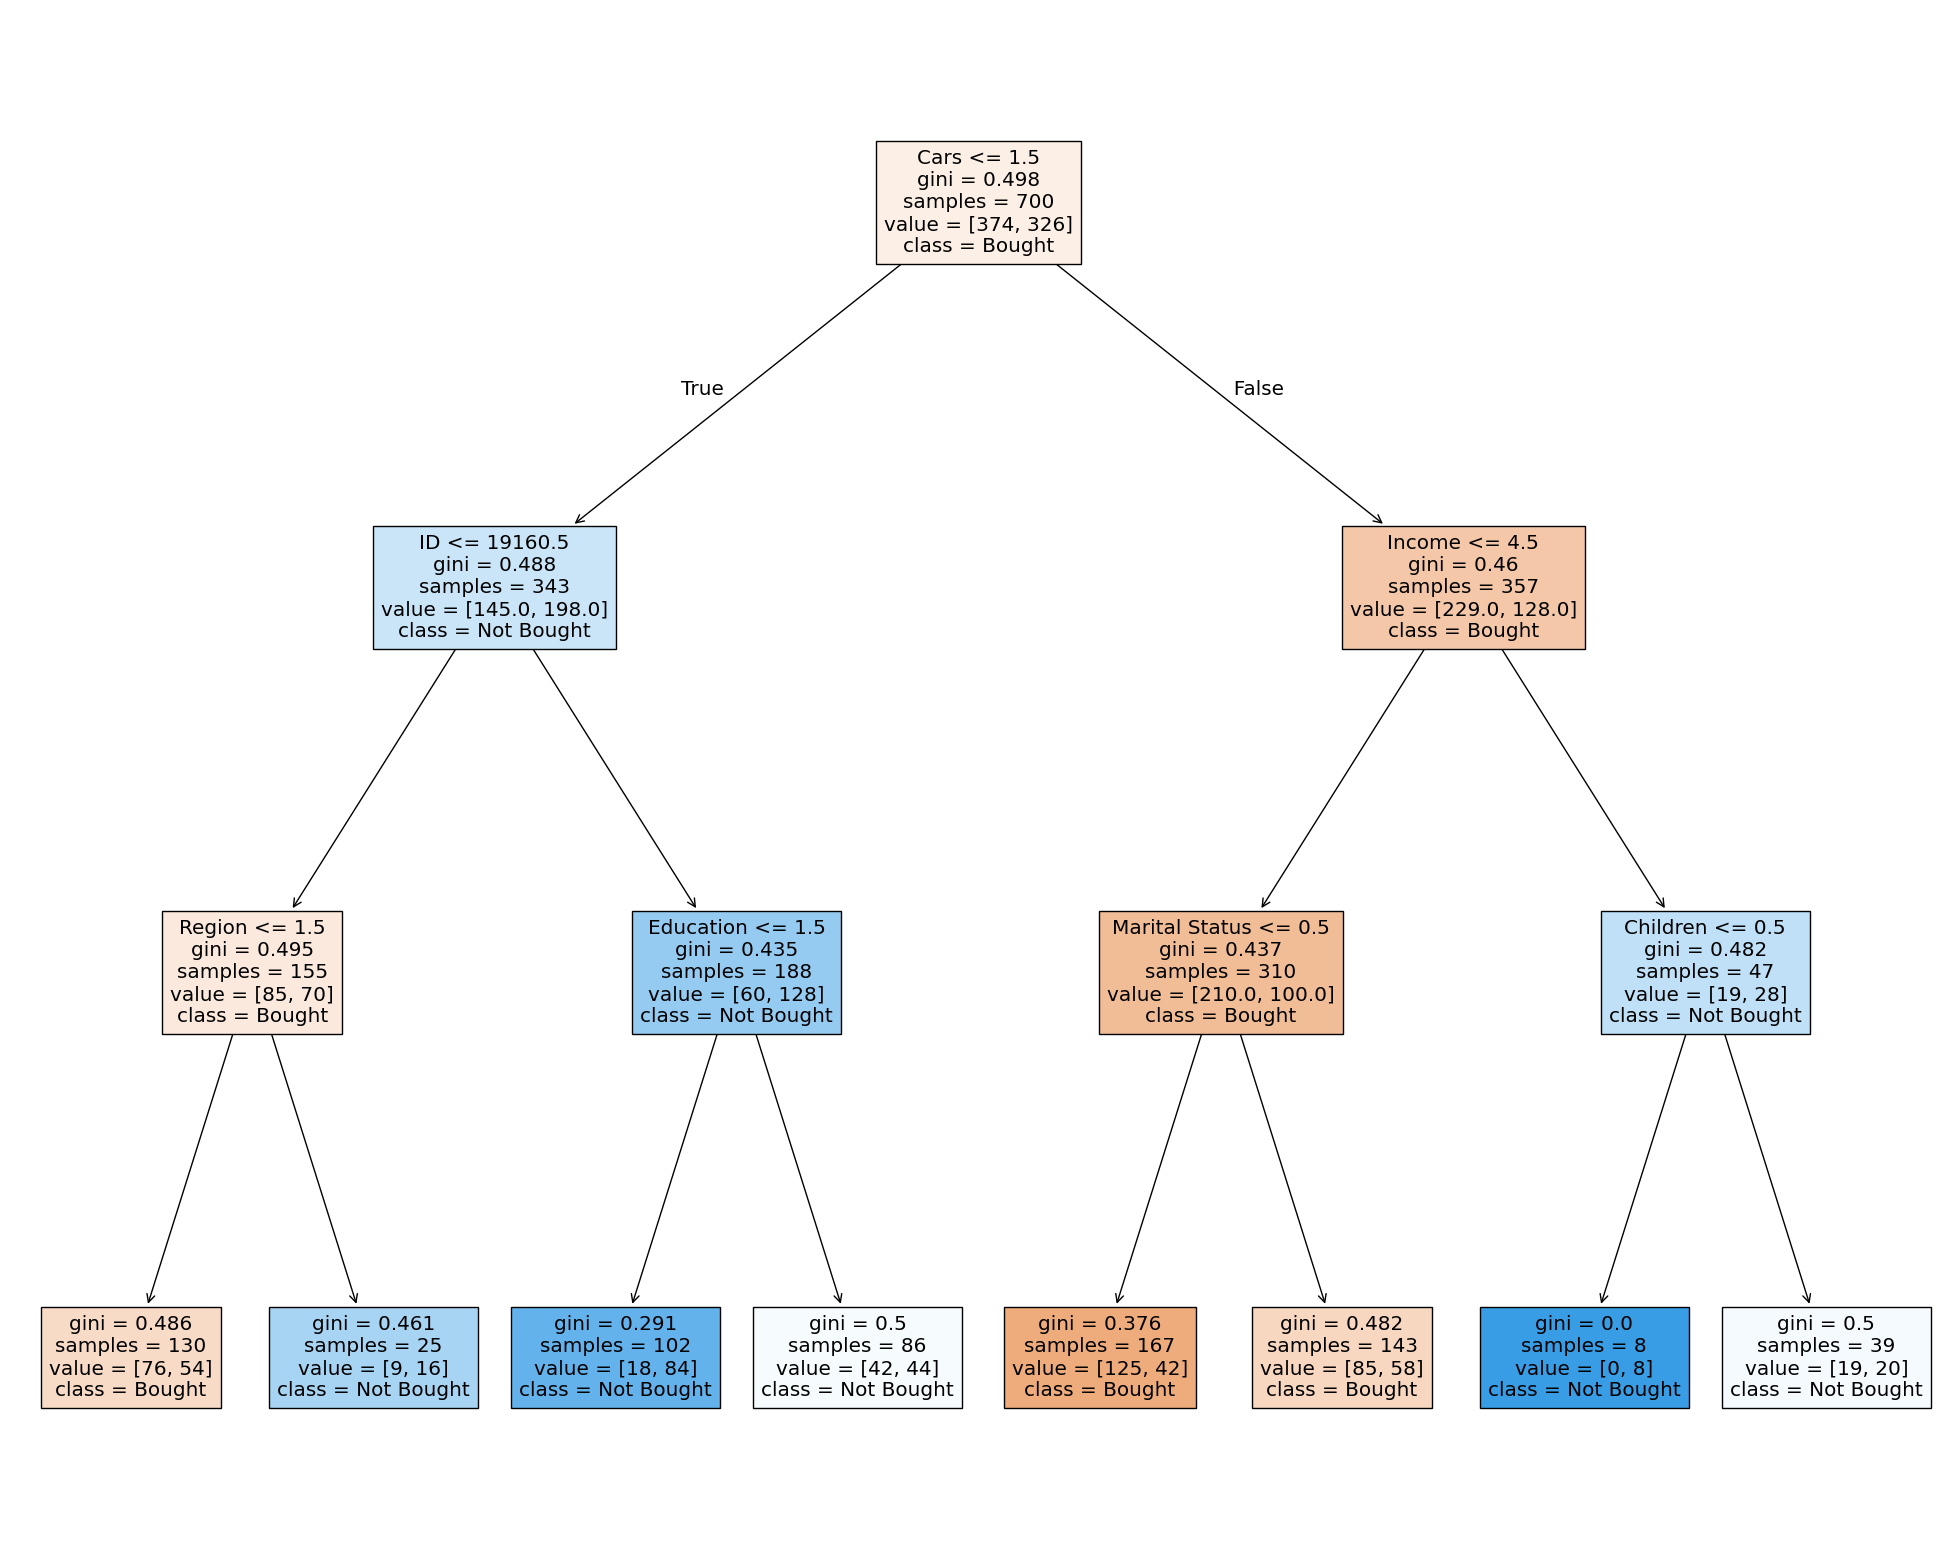

In [160]:
from sklearn import tree

fn=['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = fn,
               class_names=cn, filled=True)

**Meningkatkan Akurasi menggunakan Pencarian Grid**

In [163]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
grid_values = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth':[4,5,6,7,8,9,10], 'min_samples_split': [2,3,4]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

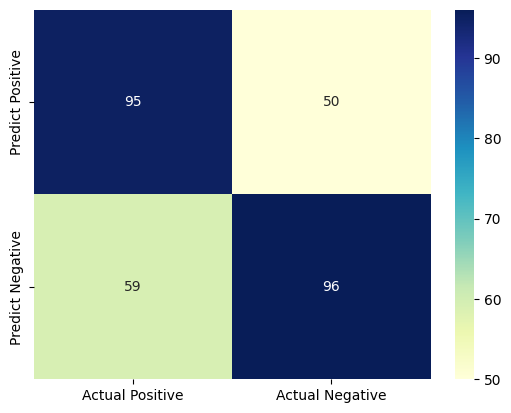

In [165]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       145
           1       0.66      0.50      0.57       155

    accuracy                           0.61       300
   macro avg       0.62      0.61      0.60       300
weighted avg       0.62      0.61      0.60       300



# Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(result))

Model accuracy score: 0.6900


In [183]:
from sklearn.metrics import make_scorer, accuracy_score

rfc = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Run the grid search
grid_obj = GridSearchCV(rfc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data
rfc.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=9)

In [184]:
y_pred4 = grid_clf_acc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

Model accuracy score: 0.5933


# XGBoost Classifier

In [186]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7100
